In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#read dataset
df = pd.read_csv('./Datasets/Advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
# checking for null
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
#checking for duplicated
df.duplicated().sum()

0

In [8]:
# describe dataset
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


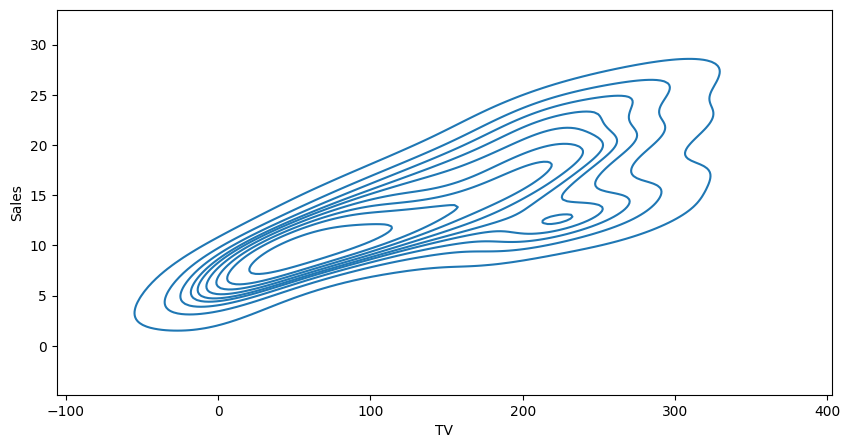

In [9]:
# Data Visualization tv and sales
plt.figure(figsize=(10,5))
sns.kdeplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

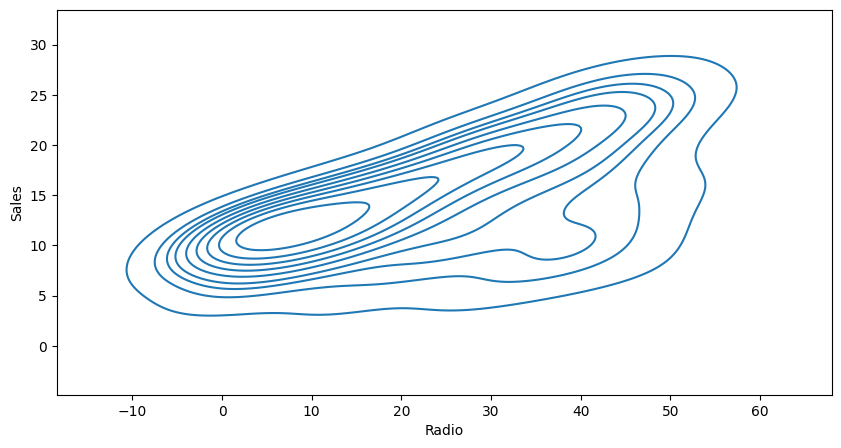

In [10]:
# Data Visualization radio and sales
plt.figure(figsize=(10,5))
sns.kdeplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

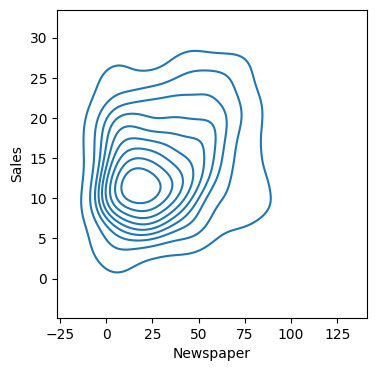

In [11]:
# Data Visualization newspaper and sales
plt.figure(figsize=(4,4))
sns.kdeplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

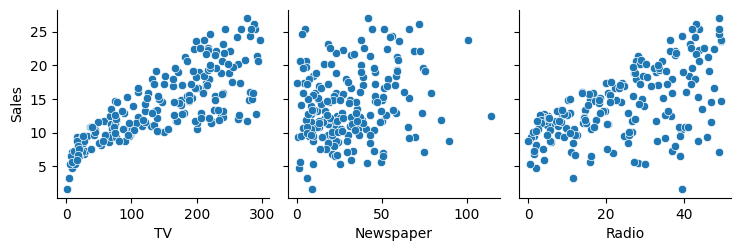

In [12]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

In [13]:
#drop sales columns 
df1=df.drop('Sales',axis=1)
df1.head()

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [14]:
df2 = df['Sales']
df2.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

<Axes: >

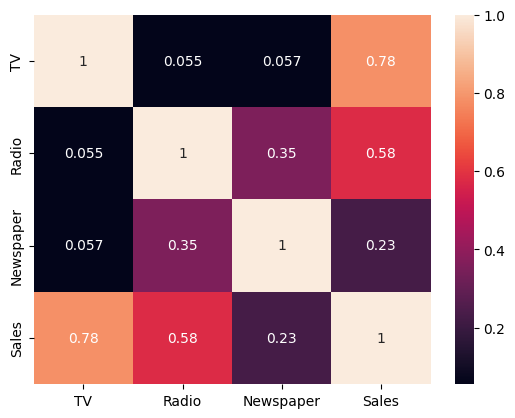

In [15]:
#Data Visualization using heat map
sns.heatmap(df[['TV','Radio','Newspaper','Sales']].corr(),annot=True)

In [16]:
# training and testing data
x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2, random_state=100)

In [17]:
#using model
model= LinearRegression()
model.fit(x_train,y_train)
y_predictions=model.predict(x_test)
y_predictions

array([10.48824161, 20.05724453, 16.82143569, 19.09208751, 20.93730253,
       13.22041472, 11.86658311, 12.49411992, 20.53530472, 20.92725284,
       10.87064977, 19.42243267,  6.4598072 , 15.29161663,  9.0273649 ,
        7.99176462, 16.21781083, 12.06186549, 17.08884053, 11.31403977,
       17.11936948,  9.85756594, 20.7384262 , 17.20189183, 15.19647914,
       21.95287722, 19.13758165, 10.098652  , 19.38317465, 14.86950178,
       14.28208526,  7.71251361,  9.97144518, 14.7914838 ,  7.25498055,
       13.64628787,  7.62827761, 11.80526556, 13.58085939, 15.18959199])

In [18]:
model.intercept_

2.8723503363517953

In [19]:
model.coef_

array([-0.00051964,  0.04559816,  0.18562488,  0.00208323])

In [20]:
actual_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predictions.flatten()
})
actual_predict.head(10)

,Actual,Predict
0,6.6,10.488242
1,20.7,20.057245
2,17.2,16.821436
3,19.4,19.092088
4,21.8,20.937303
5,12.2,13.220415
6,12.2,11.866583
7,11.7,12.494120
8,22.6,20.535305
9,22.3,20.927253


In [21]:
#Calculate mean absolute error
metrics.mean_absolute_error(y_predictions,y_test)

1.029124930516935

In [22]:
#Calculate mean squareed error
np.sqrt(metrics.mean_squared_error(y_predictions,y_test))

1.3167338335593732

In [23]:
#Calculate R-Squared
print('R-Squared',metrics.r2_score(y_predictions,y_test))

R-Squared 0.910650600783428


In [24]:
#Calculate Accuracy
print('Accuracy',metrics.r2_score(y_predictions,y_test)*100)

Accuracy 91.0650600783428
